<a href="https://colab.research.google.com/github/gohibi/eli/blob/eli/elijakelabo1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats
from scipy.stats import chi2
import math

les donnees initiales 


In [2]:
X =pd.Series([75, 88, 74, 80, 76, 82, 86, 76, 93, 74, 72, 82, 71,
82, 87, 81, 87, 79, 78, 87, 82, 87, 82, 74, 77, 83,
86, 85, 86, 76, 81, 86, 76, 71, 80, 85, 73, 75, 88,
89, 84, 85, 85, 81, 82, 85, 83, 76, 87, 87, 76, 76,
73, 78, 87, 80, 78, 72, 83, 91, 82, 93, 76, 83, 80,]) 

premier quantile

In [3]:
Q1=np.quantile(X,0.25)
print(f'Q1={Q1}')

Q1=76.0


troisieme quantile

In [4]:
Q3=np.quantile(X,0.75)
print(f'Q3={Q3}')


Q3=86.0


intervalle interquantile

In [5]:
IQR=Q3 - Q1
print(f'IQR={IQR}')

IQR=10.0


remove outliers

In [6]:
X= X[~((X < (Q1 - 1.5 * IQR)) |(X > (Q3 + 1.5 * IQR)))] #remove outlier from quartile

In [22]:
n=len(X)
Xmax = np.max(X)
Xmin=np.min(X)
R =Xmax - Xmin #Размах
k= (np.sqrt(n)).round(2) #Часто
h=(R/k).round(2)  #длина formule de h=R/k. la fonction ROUND est une fonction pour arrondi les entiers 
x0 =(Xmin - 0.5*h).round(2) #x0=Xmin-0.5*h
xk = (Xmax + 0.5*h).round(2)#xk=Xmax+0.5*h

In [23]:
print(f'n={n}\n Xmax={Xmax}\n Xmin={Xmin}\n R={R}\n k={k}\n h={h}\n x0={x0}\n xk={xk}\n')

n=65
 Xmax=93
 Xmin=71
 R=22
 k=8.06
 h=2.73
 x0=69.64
 xk=94.36



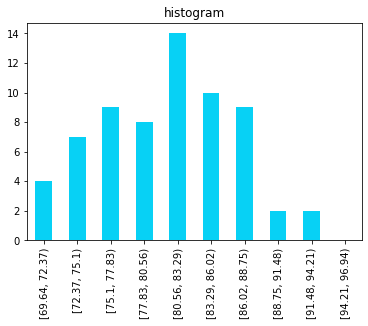

In [24]:
bin_range = np.arange(x0 , xk+h , h)
out, bins  = pd.cut(X, bins=bin_range, include_lowest=True, right=False, retbins=True)
out.value_counts(sort=False).plot.bar(color='#07d1f5', title='histogram')

In [25]:
display(out.value_counts(sort=False, ascending=False))

[69.64, 72.37)     4
[72.37, 75.1)      7
[75.1, 77.83)      9
[77.83, 80.56)     8
[80.56, 83.29)    14
[83.29, 86.02)    10
[86.02, 88.75)     9
[88.75, 91.48)     2
[91.48, 94.21)     2
[94.21, 96.94)     0
dtype: int64

In [28]:
data={'xi':[71,73.73,76.46,79.19,81.92,84.65,87.38,90.11,92.84,95.57],
      'ni':[4,7,9,8,14,10,9,2,2,0]} # xi cest la moyenne de lintervalle et ni c leffectif de lintervale 
df =pd.DataFrame(data) #Дискретный вариационный ряд
display(df)

,xi,ni
0,71.00,4
1,73.73,7
2,76.46,9
3,79.19,8
4,81.92,14
5,84.65,10
6,87.38,9
7,90.11,2
8,92.84,2
9,95.57,0


Text(0.5, 1.0, 'Polygon')

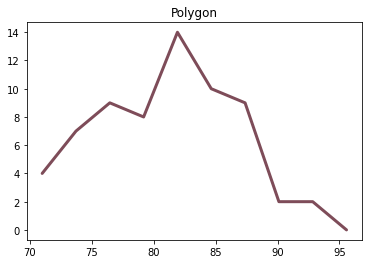

In [30]:
_,axe = plt.subplots()
axe.plot(df['xi'], df['ni'], color='#470012', alpha=0.7,
    linewidth=3, solid_capstyle='round', zorder=2)
axe.set_title('Polygon')

In [32]:
data_d ={'xi':[71,73.73,76.46,79.19,81.92,84.65,87.38,90.11,92.84,95.57],
      'ni':[4,7,9,8,14,10,9,2,2,0],
       'fi':[0.06,0.11,0.14,0.12,0.22,0.15,0.14,0.03,0.03,0],
       'cfi':[0.06,0.17,0.31,0.43,0.65,0.8,0.94,0.97,1,1]}
df1 =pd.DataFrame(data_d)
display(df1)

,xi,ni,fi,cfi
0,71.00,4,0.06,0.06
1,73.73,7,0.11,0.17
2,76.46,9,0.14,0.31
3,79.19,8,0.12,0.43
4,81.92,14,0.22,0.65
5,84.65,10,0.15,0.80
6,87.38,9,0.14,0.94
7,90.11,2,0.03,0.97
8,92.84,2,0.03,1.00
9,95.57,0,0.00,1.00


Text(0.5, 1.0, 'cumulate')

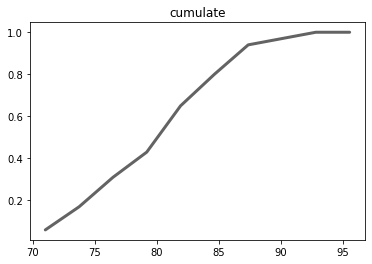

In [34]:
_,axe = plt.subplots()
axe.plot(df1['xi'], df1['cfi'], color='#212121', alpha=0.7,
    linewidth=3, solid_capstyle='round', zorder=2)
axe.set_title('cumulate')

In [35]:
Xmode=X.mode(dropna=True)    #моду
md_X=X.median(skipna=True)   #медиану
mean_X=X.mean()              #выборочную среднюю
var_X=X.var()                #выборочную дисперсию
std_X=X.std()                #выборочное среднее квадратическое отклонение
cv_X=std_X/mean_X*100        #коэффициент вариации
skew_X=X.skew(skipna=True)   #асимметрию
kurt_X=X.kurt()              #эксцесс

In [45]:
print(f'Mode={Xmode}\n ') #mode est egale a 76
print(f'Median={md_X}\n ')
print(f'Moyenne={mean_X}\n')
print(f'Variance={var_X}\n')
print(f'Std ={std_X} \n') 
print(f'Coeffiecient Variation = {cv_X}\n ') #cherche aussi sa signification 
print(f'Asymetrie = {skew_X}\n ') #cherche a savoir si c asymetrie a droite ou a gauche 
print(f'Express = {kurt_X}') # de meme pour celui la

Mode=0    76
dtype: int64
 
Median=82.0
 
Moyenne=81.15384615384616

Variance=30.819711538461554

Std =5.551550372505104 

Coeffiecient Variation = 6.84077297085937
 
Asymetrie = 0.0039004352711844614
 
Express = -0.8026946873478229


Построить доверительные интервалы для истинного значения измеряемой величины и среднего квадратического отклонения генеральной совокупности

Для математического ожидания

In [47]:
s=X.std() #ecart type
xba=X.mean() #moyenne
gamma=0.95
t=1.997137908   #=TINV(0,05; 65) по экселе  // 65 est effectif de ta serie
left_m=round(xba-t*(s/math.sqrt(n)),4)
right_m=round(xba+t*(s/math.sqrt(n)),4)
print('Confidence interval of mathematical expectation ', left_m ,'< m <', right_m)

Confidence interval of mathematical expectation  79.7786 < m < 82.529


для среднего квадратического отклонения

In [51]:
ki1_right=43.77595   # CHIINV(1,95/2;64) по эксель formule du khideux si tu veux comprendre 
ki2_left=54.04233   # CHIINV(0,05/2;64) по эксель
sigm_left=(((n-1)*(s*s))/ki2_left)
sigm_right=(((n-1)*(s*s))/ki1_right)
print('Confidence interval of standard deviation',round(sigm_left,3) ,'< s^2 <', round(sigm_right,3))




Confidence interval of standard deviation 36.498 < s^2 < 45.058


In [53]:
#VOIR LE POWERPOINT DU PREMIER LEKSIA TU VAS COMPRENDRE BEAUCOUP DU LAB